# **High-Level Steps for Video Data Processing for Action Recognition**

1.   Access Video Data: Connect to the storage (like Google Drive) where the video datasets are located.
2.   Prepare Storage Directories: Set up directories for storing extracted frames and their corresponding annotations.
3. Format Conversion: Convert bounding box data from the format provided in annotations to the format required by the recognition model.
4. Extract and Annotate Frames: Process each video to extract frames and annotate them according to the recognition model's needs.
5. Organize and Save Data: Ensure all extracted frames and annotations are saved in an organized manner in the designated directories.
6. Process All Videos: Automatically handle all videos in the dataset to prepare them for further analysis or model training.




In [ ]:
from google.colab import drive
import cv2
import os
import json

# Mount Google Drive
drive.mount('/content/drive')

# Base directory where your categorized subfolders are located
base_dir = '/content/drive/My Drive/Gun_Action_Recognition_Dataset'

# Directory to save the extracted frames and YOLO formatted annotations
frames_base_dir = '/content/drive/My Drive/Frames'

# Ensure the frames base directory exists
if not os.path.exists(frames_base_dir):
    os.makedirs(frames_base_dir)



# Function to convert bbox from COCO format (x, y, width, height) to xyxy format
def convert_to_xyxy_format(bbox, img_width, img_height):
    x1 = bbox[0]
    y1 = bbox[1]
    x2 = x1 + bbox[2]
    y2 = y1 + bbox[3]
    return x1, y1, x2, y2

# Function to extract frames and save annotations in YOLO format
def extract_frames_and_annotations(video_path, labels_path, frames_dir):
    # Load annotations
    with open(labels_path, 'r') as f:
        annotations = json.load(f)['annotations']

    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_path = os.path.join(frames_dir, f'frame_{frame_id}.jpg')
        cv2.imwrite(frame_path, frame)

        # Save YOLO annotations for each frame
        with open(os.path.join(frames_dir, f'frame_{frame_id}.txt'), 'w') as f:
            frame_annotations = [ann for ann in annotations if ann['image_id'] == frame_id + 1]
            for ann in frame_annotations:
                rcnn_bbox = convert_to_xyxy_format(ann['bbox'], frame.shape[1], frame.shape[0])
                f.write(f"{ann['category_id'] - 1} {rcnn_bbox[0]} {rcnn_bbox[1]} {rcnn_bbox[2]} {rcnn_bbox[3]}\n")

        frame_id += 1
    cap.release()

# Function to iterate over subfolders and process each video and label file
def process_folders(base_dir, frames_base_dir):
    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            for subfolder in os.listdir(category_path):
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path):
                    video_file = next((f for f in os.listdir(subfolder_path) if f.endswith('.mp4')), None)
                    label_file = next((f for f in os.listdir(subfolder_path) if f.endswith('.json')), None)

                    if video_file and label_file:
                        video_path = os.path.join(subfolder_path, video_file)
                        labels_path = os.path.join(subfolder_path, label_file)
                        frames_dir = os.path.join(frames_base_dir, category, subfolder)

                        if not os.path.exists(frames_dir):
                            os.makedirs(frames_dir)

                        # Extract frames and save annotations
                        extract_frames_and_annotations(video_path, labels_path, frames_dir)
                        print(f'Processed {video_file} in {subfolder_path}')

# Run the process
process_folders(base_dir, frames_base_dir)


Mounted at /content/drive
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PAW2_C2_P3_V1_HB_2
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PAW8_C2_P5_V3_HB_4
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PAW8_C1_P4_V1_HB_2
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PCW9_C1_P2_V1_HB_6
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PCW5_C1_P4_V1_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PCW9_C1_P2_V1_HB_8
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PCW1_C1_P4_V1_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PCW5_C2_P3_V2_HB_2
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Machine_Gun/PCW1_C2_P3_V

In [ ]:
from google.colab import drive
import cv2
import os

# Mount Google Drive
drive.mount('/content/drive')

# Base directory where your categorized subfolders are located
base_dir = '/content/drive/My Drive/Gun_Action_Recognition_Dataset'

# Directory to save the extracted frames
frames_base_dir = '/content/drive/My Drive/Frames'

# Ensure the frames base directory exists
if not os.path.exists(frames_base_dir):
    os.makedirs(frames_base_dir)

# Function to extract only frames without annotations
def extract_only_frames(video_path, frames_dir):
    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(frames_dir, f'frame_{frame_id}.jpg')
        cv2.imwrite(frame_path, frame)
        frame_id += 1
    cap.release()

def process_folders(base_dir, frames_base_dir, target_category="No_Gun"):
    try:
        category_path = os.path.join(base_dir, target_category)
        if os.path.isdir(category_path):
            for subfolder in os.listdir(category_path):
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path):
                    video_file = next((f for f in os.listdir(subfolder_path) if f.endswith('.mp4')), None)

                    if video_file:
                        video_path = os.path.join(subfolder_path, video_file)
                        frames_dir = os.path.join(frames_base_dir, target_category, subfolder)

                        if not os.path.exists(frames_dir):
                            os.makedirs(frames_dir)

                        extract_only_frames(video_path, frames_dir)
                        print(f'Processed {video_file} in {subfolder_path}')
                    else:
                        print(f"No video files found in {subfolder_path}")
            else:
                print(f"No subfolders found in {category_path}")
        else:
            print(f"Directory does not exist: {category_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


# Run the process specifically for the NoGun category
process_folders(base_dir, frames_base_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N11_C2_P5_V2_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N6_C2_P5_V2_HB_3
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N9_C2_P5_V2_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N1_C2_P3_V2_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N2_C1_P2_V1_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N5_C1_P4_V1_HB_4
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N5_C1_P4_V1_HB_2
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/No_Gun/N6_C2_P5_V2_HB_2
Processed video.mp4 in /content/drive/My Drive/Gun_Act

In [ ]:
from google.colab import drive
import os

# This will prompt you for authorization to access your Google Drive.
drive.mount('/content/drive')

# Now change the directory to the specified folder within your Drive.
os.chdir('/content/drive/My Drive/Frames/Machine_Gun/')

# You can print the current working directory to confirm the change.
print("Current Working Directory:", os.getcwd())


Mounted at /content/drive
Current Working Directory: /content/drive/My Drive/Frames/Machine_Gun


# **Verifying** Annotation Accuracy Through Image Visualization with Bounding Box
1.   Extracting Bounding Box Data: The script reads bounding box coordinates from an annotation file. These coordinates define specific regions in an image, typically for object detection tasks.
2.  Displaying Images with Annotations: It then displays the image, overlaying it with the bounding boxes to visually represent the areas of interest (as specified by the bounding box data). This is useful for verifying the accuracy of annotations in image processing and computer vision applications.



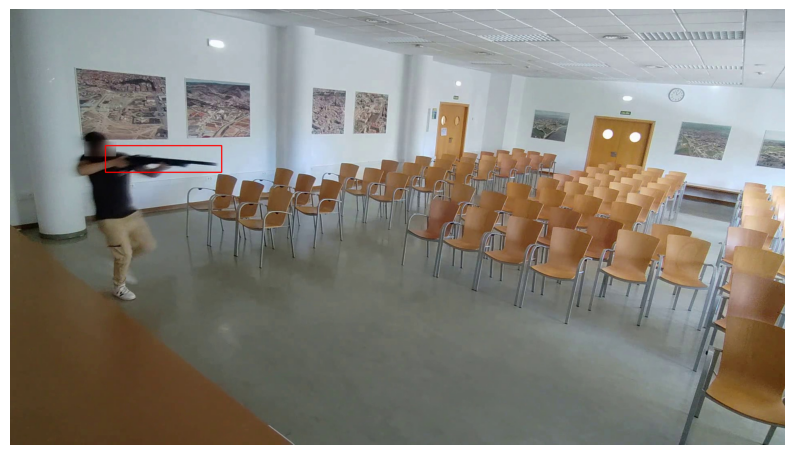

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to read an annotation file and parse it
def read_annotation(file_path):
    with open(file_path, 'r') as file:
        data = file.read().strip()
        _, xmin, ymin, xmax, ymax = map(float, data.split())
    return xmin, ymin, xmax, ymax

# Function to display an image with bounding boxes
def display_image_with_boxes(image_path, boxes):
    # Read the image
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw the bounding box
        xmin, ymin, xmax, ymax = boxes
        start_point = (int(xmin), int(ymin))
        end_point = (int(xmax), int(ymax))
        color = (255, 0, 0)  # Blue color in RGB
        thickness = 2

        image = cv2.rectangle(image, start_point, end_point, color, thickness)

        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        print(f"Error: Image not found at {image_path}")

# Define paths to the image and annotation files
image_file_name = 'PAW2_C2_P3_V1_HB_2/frame_93.jpg'
annotation_file_name = 'PAW2_C2_P3_V1_HB_2/frame_93.txt'

# Adjust the paths based on the current working directory
base_path = '/content/drive/My Drive/Frames/Machine_Gun/'
image_path = os.path.join(base_path, image_file_name)
annotation_path = os.path.join(base_path, annotation_file_name)

# Read the annotation
bounding_boxes = read_annotation(annotation_path)

# Display the image with the bounding boxes
display_image_with_boxes(image_path, bounding_boxes)


# **Automating Data Reformatting for Image Annotations**
This process involves systematically renaming images and creating a new CSV file to catalog their annotations:


1. Setup Initial Variables: Define paths for the base directory containing images and the CSV file that will store the new annotations. Set a starting number for image renaming to ensure unique names.
2. Prepare CSV File: Open a CSV file for writing and insert a header row specifying the columns for image names and their respective bounding box coordinates.
3. Process Image Files: Loop through each subfolder and image file within the base directory. For each image:
Rename the image to a systematic name starting with a unique counter.
Locate and read the corresponding annotation file, extracting bounding box data.
Write the new image name and its bounding box data into the CSV file. Handle cases where the annotation file is missing or empty by recording the image with empty annotation fields.
4. Rename and Update File Paths: Move (rename) the original image file to the new image name within the same directory, ensuring that all references in the dataset reflect the updated naming convention.
5. Log Completion: After processing all images, log the completion of the task, indicating the last image renamed. This helps in tracking progress and ensures that all files have been appropriately handled.


In [ ]:
import os
import csv
import shutil

# Define base directory
base_dir = '/content/drive/My Drive/Frames/Hand_gun'
csv_file_path = '/content/drive/My Drive/Frames/hand_gun_annotations.csv'
image_counter = 35755  # Start numbering from 100

# Open CSV file for writing
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the CSV header
    writer.writerow(['image_name', 'class', 'xmin', 'ymin', 'xmax', 'ymax'])

    # Iterate over subfolders in Hand_gun directory
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        if os.path.isdir(subfolder_path):  # Check if it is a directory
            # Iterate over files in subfolders
            for filename in os.listdir(subfolder_path):
                if filename.endswith('.jpg'):
                    # Prepare the new image name
                    new_image_name = f"Image{image_counter}.jpg"
                    # Read the corresponding .txt file
                    txt_file_path = os.path.join(subfolder_path, filename.replace('.jpg', '.txt'))
                    # Check if the .txt file exists
                    if os.path.exists(txt_file_path) and os.path.getsize(txt_file_path) > 0:
                        with open(txt_file_path, 'r') as txt_file:
                            annotation_data = txt_file.read().strip().split()
                            if len(annotation_data) == 5:  # Ensure it's the expected format
                                _, xmin, ymin, xmax, ymax = map(float, annotation_data)
                                writer.writerow([new_image_name, 'HandGun', xmin, ymin, xmax, ymax])
                            else:
                                writer.writerow([new_image_name, 'HandGun', None, None, None, None])
                    else:
                        # Handle empty or missing .txt files
                        writer.writerow([new_image_name, 'HandGun', None, None, None, None])

                    # Rename the .jpg file
                    new_image_path = os.path.join(subfolder_path, new_image_name)
                    old_image_path = os.path.join(subfolder_path, filename)
                    shutil.move(old_image_path, new_image_path)

                    # Increment the counter for the next image
                    image_counter += 1

print(f"Renaming and CSV writing completed, images renamed until Image{image_counter-1}.jpg")


Renaming and CSV writing completed, images renamed until Image70794.jpg


In [ ]:
from google.colab import drive
import cv2
import os
import json

# Mount Google Drive
drive.mount('/content/drive')

# Base directory where your categorized subfolders are located
base_dir = '/content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun'

# Directory to save the extracted frames and YOLO formatted annotations
frames_base_dir = '/content/drive/My Drive/Frames/Hand_gun'

# Ensure the frames base directory exists
if not os.path.exists(frames_base_dir):
    os.makedirs(frames_base_dir)

# Function to convert bbox from COCO format (x, y, width, height) to xyxy format
def convert_to_xyxy_format(bbox, img_width, img_height):
    x1 = bbox[0]
    y1 = bbox[1]
    x2 = x1 + bbox[2]
    y2 = y1 + bbox[3]
    return x1, y1, x2, y2

# Function to extract frames and save annotations in YOLO format
def extract_frames_and_annotations(video_path, labels_path, frames_dir):
    # Load annotations
    with open(labels_path, 'r') as f:
        annotations = json.load(f)['annotations']

    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_path = os.path.join(frames_dir, f'frame_{frame_id}.jpg')
        cv2.imwrite(frame_path, frame)

        # Save YOLO annotations for each frame
        with open(os.path.join(frames_dir, f'frame_{frame_id}.txt'), 'w') as f:
            frame_annotations = [ann for ann in annotations if ann['image_id'] == frame_id + 1]
            for ann in frame_annotations:
                rcnn_bbox = convert_to_xyxy_format(ann['bbox'], frame.shape[1], frame.shape[0])
                f.write(f"{ann['category_id'] - 1} {rcnn_bbox[0]} {rcnn_bbox[1]} {rcnn_bbox[2]} {rcnn_bbox[3]}\n")

        frame_id += 1
    cap.release()

# Function to process the specific "Handgun" folder
def process_handgun_folder(base_dir, frames_base_dir):
    if os.path.isdir(base_dir):
        for subfolder in os.listdir(base_dir):
            subfolder_path = os.path.join(base_dir, subfolder)
            if os.path.isdir(subfolder_path):
                video_file = next((f for f in os.listdir(subfolder_path) if f.endswith('.mp4')), None)
                label_file = next((f for f in os.listdir(subfolder_path) if f.endswith('.json')), None)

                if video_file and label_file:
                    video_path = os.path.join(subfolder_path, video_file)
                    labels_path = os.path.join(subfolder_path, label_file)
                    frames_dir = os.path.join(frames_base_dir, subfolder)

                    if not os.path.exists(frames_dir):
                        os.makedirs(frames_dir)

                    # Extract frames and save annotations
                    extract_frames_and_annotations(video_path, labels_path, frames_dir)
                    print(f'Processed {video_file} in {subfolder_path}')

# Run the process on the "Handgun" folder
process_handgun_folder(base_dir, frames_base_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PAH6_C2_P5_V1_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PAH3_C2_P3_V1_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PAH5_C2_P3_V2_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PAH2_C2_P5_V1_HB_4
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PAH3_C1_P2_V1_HB_1
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PCH2_C1_P4_V1_HB_2
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PCH6_C1_P4_V1_HB_2
Processed video.mp4 in /content/drive/My Drive/Gun_Action_Recognition_Dataset/Handgun/PAH3_C2_P5_V2_HB_2
Processed video.mp4 in /content

In [ ]:
import os
import csv
import shutil

# Define base directory
base_dir = '/content/drive/My Drive/Frames/No_Gun'
csv_file_path = '/content/drive/My Drive/Frames/no_gun_annotations.csv'
image_counter = 70795  # Start numbering from 35755

# Open CSV file for writing
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the CSV header
    writer.writerow(['image_name', 'class'])

    # Iterate over subfolders in No_gun directory
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        if os.path.isdir(subfolder_path):  # Check if it is a directory
            # Iterate over files in subfolders
            for filename in os.listdir(subfolder_path):
                if filename.endswith('.jpg'):
                    # Prepare the new image name
                    new_image_name = f"Image{image_counter}.jpg"

                    # Write the image name and class to the CSV
                    writer.writerow([new_image_name, 'NoGun'])

                    # Rename the .jpg file
                    new_image_path = os.path.join(subfolder_path, new_image_name)
                    old_image_path = os.path.join(subfolder_path, filename)
                    shutil.move(old_image_path, new_image_path)

                    # Increment the counter for the next image
                    image_counter += 1

print(f"Renaming and CSV writing completed, images renamed until Image{image_counter-1}.jpg")


Renaming and CSV writing completed, images renamed until Image99814.jpg


# Stratified Split

ask of splitting your dataset into training, validation, and test sets based on image annotations and classes specified in finaldata.csv, and then distributing these images and annotations into respective folders while preserving class balance,

In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the DataFrame
file_path = '/content/drive/My Drive/Frames/finaldata.csv'
df = pd.read_csv(file_path)

# Perform a stratified split
train_val, test = train_test_split(df, test_size=0.1, stratify=df['class'], random_state=42)
train, val = train_test_split(train_val, test_size=1/9, stratify=train_val['class'], random_state=42)  # 0.1/0.9 = 1/9

# Print the shapes of the splits
print("Train set shape:", train.shape)
print("Validation set shape:", val.shape)
print("Test set shape:", test.shape)


# Copy Iamges


To manage the task of copying images to specific training, validation, and test folders based on CSV files that define the split (train.csv, val.csv, test.csv), and using a base folder with multiple subfolders containing images, we can adapt your provided code snippet. Here's a step-by-step plan and a Python script to do just that:

Step 1: Prepare the Environment
You'll need the CSV files for each split and a clear path to where the images are stored.

Step 2: Script to Copy Images
The script will read from each CSV (train, val, test), find each image in the subdirectories, and copy them into designated folders (train_data, val_data, test_data). This will ensure no original data is modified or moved.

In [ ]:
import os
import shutil
import pandas as pd

# Paths
base_dir = '/content/drive/My Drive/Frames'
train_csv = '/content/drive/My Drive/Frames/train.csv'
val_csv = '/content/drive/My Drive/Frames/val.csv'
test_csv = '/content/drive/My Drive/Frames/test.csv'

# Image directories
directories = ['Hand_gun', 'Machine_Gun']

# Destination folders
train_dest_dir = '/content/drive/My Drive/Frames/train_data'
val_dest_dir = '/content/drive/My Drive/Frames/val_data'
test_dest_dir = '/content/drive/My Drive/Frames/test_data'

# Create destination directories if they don't exist
os.makedirs(train_dest_dir, exist_ok=True)
os.makedirs(val_dest_dir, exist_ok=True)
os.makedirs(test_dest_dir, exist_ok=True)

def copy_images(csv_path, dest_dir):
    df = pd.read_csv(csv_path)
    # Iterate through the dataframe rows
    for _, row in df.iterrows():
        image_name = row['image_name']
        found = False

        # Search for the image in both directories
        for dir_name in directories:
            if found:
                break  # Exit if image is found in one of the directories

            # Iterate through subfolders of each directory
            dir_path = os.path.join(base_dir, dir_name)
            for subfolder in os.listdir(dir_path):
                subfolder_path = os.path.join(dir_path, subfolder)
                if not os.path.isdir(subfolder_path):
                    continue

                image_path = os.path.join(subfolder_path, image_name)
                if os.path.exists(image_path):
                    shutil.copy(image_path, os.path.join(dest_dir, image_name))
                    found = True
                    break

# Copy images based on CSV files
copy_images(train_csv, train_dest_dir)
copy_images(val_csv, val_dest_dir)
copy_images(test_csv, test_dest_dir)

print("Images have been copied to their respective directories.")
